# 評価

　　機械学習のモデルを作る　フローの中で重要な役割を持つの

##評価手法の種類

　　・混同行列
　　・適合率
　　・再現率　などの概念を学習する

例：　乳がんの疾患モデルを利用して行う
　　


In [1]:
# 日本語化ライブラリの導入

!pip install japanize-matplotlib | tail -n 1

# 共通事前処理

# 余分なワーニングを非表示にする
import warnings
warnings.filterwarnings('ignore')

# ライブりのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#matplotlibの日本語化対応
import japanize_matplotlib

#データフレーム表示用関数
from IPython.display import display

# 表示オプション調整
# NumPyの不動招集点の表示精度
np.set_printoptions(suppress=True, precision=4)
# pandasでの浮動小数点の表示精度
pd.options.display.float_format = '{:.4f}'.format
#データフレームで全ての項目を表示
pd.set_option("display.max_columns", None)
#グラフのデフォルトフォントの指定
plt.rcParams["font.size"] = 14
#乱数の種
random_seed = 123

## 混同行列

　分類の処理パターン

　　　・精度 (Accuracy) 　・・・　予想結果の正解率

　詳細にモデルを評価する際に必須の概念　・・・　「混同行列」(Confusion Matrix)

 例：　乳がんの疾患予想モデル

 目的　：　できるだけ多くの悪性を検知すること

 つまり、　**良性を良性と予測することの重要性は低い**

 「モデルは、悪性と予想したが正解は良性だった」と「モデルは良性として予想したが正解は悪性だった」

 　この２パターンであれば後者がモデルとしては致命的

 モデルの予想結果には、「悪性」「良性」、正解データには「悪性」「良性」

 以上の４パターンそれぞれ件数を集計し表の形で整理する

 →　これを混同行列とする


In [2]:
# データの読み込みから分類まで

# ライブラリのインポート
from sklearn.datasets import load_breast_cancer

#データのロード
cancer = load_breast_cancer()

#　入力データX
x= cancer.data

# 正解データy
# 良性：０　悪性：1に値を変更する
y = 1- cancer.target

# 入力データを２次元に絞り込み
x2 = x[:, :2]

# (4) データの分割
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x2, y, train_size=0.7, test_size=0.3, random_state=random_seed)

In [3]:
# アルゴリズム選択から評価まで

# アルゴリズム選択 (ロジスティック回帰)
from sklearn.linear_model import LogisticRegression
algorithm = LogisticRegression(random_state=random_seed)

# 学習
algorithm.fit(x_train, y_train)

#　予想
y_pred = algorithm.predict(x_test)

# 評価
score = algorithm.score(x_test, y_test)

# 結果確認
print(f'score: {score:.4f}')

score: 0.8772


In [4]:
# 混同行列の計算

# 必要ライブラリの取り込み
from sklearn.metrics import confusion_matrix

# 混同行列の生成
# y_test : 検証データの正解データ
# y_pred : 検証データの予測結果
matrix = confusion_matrix(y_test, y_pred)

# 結果の確認
print(matrix)


[[101   2]
 [ 19  49]]


In [5]:
# 混同行列表示用の関数の生成

def make_cm(matrix, columns):
  # matrix numpy配列

  # columns 項目名リスト
  n = len(columns)

  # '正解データ'をn回繰り返すリスト生成
  act = ['正解データ'] * n
  pred = ['予測結果'] * n

  # データフレームの生成
  cm = pd.DataFrame(matrix,
                    columns=[pred, columns], index=[act, columns])
  return cm

In [6]:
# make_cmを使った混同行列の表示
cm = make_cm(matrix, ['良性', '悪性'])
display(cm)

予測結果    
           良性  悪性
正解データ 良性  101   2
      悪性   19  49

### Cofusion Matrixの検証するときのみかた

悪性ー悪性 :　TF (True Positive ) :　モデルの予想結果が陽性(positive)で正解だった件数 \\
 悪性ー良性　: FP (False Positive) : モデルの予想結果が陽性(positive)で不正解(Falseだった）件数

良性ー陰性： FN (False Negative) : モデルの予想結果が陰性(Negative) で不正解 (False) だった件数 \\
良性ー良性 : TN (True Negative ) ：　モデルの予想結果が陰性（negative)で正解（True)だった件数

#### 精度・適合率・再現率・F値

　**精度　：　「正解数」を「全体件数」で割った比**

 (全体件数) = TP + FP + FN + TN
 (正解数） = TP + PN

$精度(Accurary) = \frac{(正解数)}{(全体件数)}   = \frac{TP+TN}{TP+FP+FN+TN} $

 **適合率(Precision) : モデルが「陽性」と予想した対象のうち、本当に「陽性」だった割合**

 $ 適合率(Precision) = \frac{TP}{TP+FP} $

 **再現率(Recall) : 本当に陽性だったデータの内、どの程度をモデルで「陽性」と検知できたか**

 　　$再現率(Recall) = \frac{TP}{TP+FN} $

  **F値 (F-score)** : 業務的に重要な陽性の値が存在し、そのよそう結果を重視したい。しかし、適合率や再現率をみるのではなく、両者をバランスよく改善させたいときに使うパラメータ
  
  $ F1 = \frac{2・（適合率)・(再現率)}{(適合率)+(再現率)} $　


In [7]:
# 適合率・再現率・F値の計算

# ライブラリの読み込み
from sklearn.metrics import precision_recall_fscore_support

# 適合率・再現率・F値の計算
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

#結果の表示
print(f'適合率　: {precision:.4f}')
print(f'再現率 : {recall:.4f}')
print(f'F値　 : {fscore:.4f}')

適合率　: 0.9608
再現率 : 0.7206
F値　 : 0.8235


### 指標値の使い分けについて

**精度 (Accuracy)**

　正解データの陽性と陰性の数のバランスがよく、業務的にも「どちらの値が重要」という区分けがない場合に利用。　逆に陽性の検出が業務上重要な場合、特に正解データの比率がアンバランスな場合は制度ではないものを使う方がよい

**適合率(Precision)**

 陽性の予測結果がどの程度正確かが業務に直結する場合は、適合率で評価する

 **再現率(Recall)**

 故障など**問題のある事象を洗い出したい(陽性を漏れなく見つけたい)**

 例：病気疾患の検知や営業要員が多い場合の営業成約予想モデル

 **F値 (F-score)**

  予想結果の陽性が業務的に重要なので精度を用いたくないが、適合率か再現率に特化するのではなくバランよく評価をしたい場合に利用する


## 確率値と閾値の関係

　分類のモデルでは、予想結果の実態が確率値で表現される

　そのため, 0.5（閾値）より大きいか小さいかで、0か１かを出力しているアルゴリズムが多い

そこで, 作ったモデルの確率値を抽出して、閾値を変更することでモデル出力結果のコントロールをする

基本的にデフォルト値は0.5が多いがいつもこの値を使うとは限らない。

業務要件によって最適な値を決めて、その設定を含めて「モデル」として取り扱って構わない

In [8]:
# 確率値の取得
#prdict_proba関数は、確率変数を予測クラスに対して出力
#　そのため足し算したら１となるはず
y_proba =  algorithm.predict_proba(x_test)
print(y_proba[:10, :])

[[0.9925 0.0075]
 [0.9981 0.0019]
 [0.0719 0.9281]
 [0.8134 0.1866]
 [0.0345 0.9655]
 [0.6376 0.3624]
 [0.9694 0.0306]
 [0.9743 0.0257]
 [0.76   0.24  ]
 [0.9775 0.0225]]


In [9]:
# positive(1)の確率値の取得
y_proba1 = y_proba[:,1]

# 結果の確認
print(y_test[10:20])
print(y_pred[10:20])
print(y_proba1[10:20])

[0 1 1 0 1 0 0 0 0 0]
[0 1 0 0 1 0 0 0 0 0]
[0.2111 0.9188 0.1617 0.0609 0.631  0.0549 0.0601 0.0506 0.0383 0.0164]


In [10]:
# 閾値を変化させる
thres = 0.5
print((y_proba1[10:20] > thres).astype(int))

thres = 0.7
print((y_proba1[10:20] > thres).astype(int))

[0 1 0 0 1 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0]


In [11]:
# 閾値を変更した場合の予測関数の定義
def pred(algorithm, x, thres):
  # 確率値の取得
  y_proba = algorithm.predict_proba(x)

  #予測結果１の確率値
  y_proba1 = y_proba[:, 1]

  #予測結果1の確率値　> 閾値
  y_pred = (y_proba1 > thres).astype(int)
  return y_pred

In [12]:
# 閾値0.5で予測結果の取得
pred_05 = pred(algorithm, x_test, 0.5)

# 閾値0.7で予想結果の取得
pred_07 = pred(algorithm, x_test, 0.7)

# 結果確認
print(pred_05[10:20])
print(pred_07[10:20])

[0 1 0 0 1 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0]


### PR曲線とROC曲線

閾値を変化させた時の精度の変化をプロットして、できた曲線によりモデルの性能を調べる手法

**PR曲線**

 モデル内の確率値を使って閾値をへんこうさせていくと、モデルの適合率と再現率は変化する

 閾値を変化させた時の適合率と再現率の値をグラフの中でプロっっとして、できた曲線によりモデル精度を評価

 この時の曲線を**PR曲線(Precision-Recall curve)**と呼ぶ

In [13]:
# ライブラリの導入
from sklearn.metrics import precision_recall_curve
# 適合率、再現率、閾値の取得
precision, recall, thresholds = precision_recall_curve(y_test, y_proba1)

#結果をデータフレームにする
df_pr = pd.DataFrame([thresholds, precision, recall]).T
df_pr.columns = ['閾値', '適合率', '再現率']

#閾値０.5周辺を表示
display(df_pr[52:122:10])

,閾値,適合率,再現率
52,0.1473,0.7901,0.9412
62,0.2027,0.8310,0.8676
72,0.3371,0.9344,0.8382
82,0.5347,0.9608,0.7206
92,0.7763,0.9756,0.5882
102,0.9025,1.0000,0.4559
112,0.9829,1.0000,0.3088


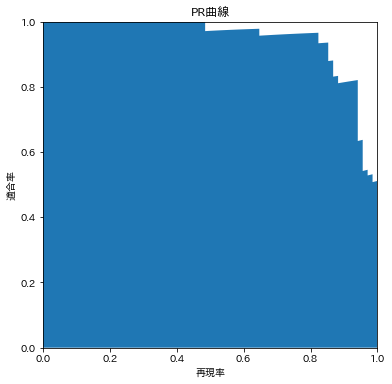

In [14]:
# 描画サイズ指定
plt.figure(figsize=(6,6))
# グラフ領域の塗りつぶし
plt.fill_between(recall, precision, 0)
#x, yの範囲指定
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

#ラベル・タイトルの表示
plt.xlabel('再現率')
plt.ylabel('適合率')
plt.title('PR曲線')
plt.show()

 　このグラフを見る際に重要なのは、塗りつぶされた面積である

 　この面積が１に近いほど、モデルの精度が高いことが知られている。

In [15]:
# PR曲線下面積の計算
# 指標としては、0.9以上だと性能が良いとされている
# auc ( area under the curve)
from sklearn.metrics import auc
pr_auc = auc(recall, precision)
print(f'PR曲線下面積 : {pr_auc:.4f}')

PR曲線下面積 : 0.9459


**ROC(Receiver Operating Characteristic) 曲線**

 閾値を変化させた時のモデルの変化をプロットするという考えはPR曲線と同じ

 「敏感度」と「偽陽性率」の2つの指標を定義する

 $ 敏感度 = \frac{TP}{TP+FN} $

 $ 偽陽性率 = \frac{FP}{FP + TN} $

 敏感度は,  再現率と同じものを意味する。





In [16]:
# ROC 曲線用配列の生成

# ライブラリの導入
from sklearn.metrics import roc_curve

# 偽陽性率、敏感度、閾値の取得
# drop_intermediate = False (閾値を変えたときに変化しない時が省略されないように設定)
fpr, tpr, thresholds = roc_curve(
    y_test, y_proba1, drop_intermediate=False)

# 結果をデータフレームにする
df_roc = pd.DataFrame([thresholds, fpr, tpr]).T
df_roc.columns = ['閾値', '偽陽性率', '敏感度']

# 閾値0.5の周辺を表示
display(df_roc[21:91:10])

,閾値,偽陽性率,敏感度
21,0.9829,0.0000,0.3088
31,0.9025,0.0000,0.4559
41,0.7763,0.0097,0.5882
51,0.5347,0.0194,0.7206
61,0.3371,0.0388,0.8382
71,0.2027,0.1165,0.8676
81,0.1473,0.1650,0.9412


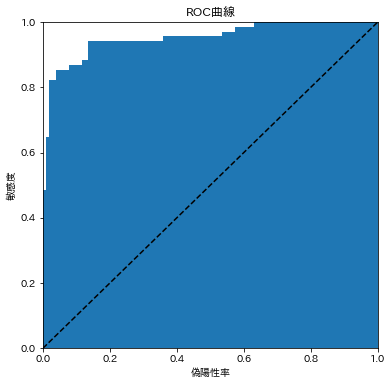

In [17]:
# ROC曲線の描画

# 描画サイズ指定
plt.figure(figsize=(6,6))

# 点線の表示
plt.plot([0, 1], [0, 1], 'k--')

# グラフ領域の塗りつぶし
plt.fill_between(fpr, tpr, 0)

# x, yの範囲の指定
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# ラベル・タイトルの表示
plt.xlabel('偽陽性率')
plt.ylabel('敏感度')
plt.title('ROC曲線')
plt.show()

この点線は、最悪ケースのモデルを示している

モデルの予測結果が陽性と陰性の分類にまったく役に立たない場合、理論上ROC曲線は点線と同じになる

面積の場合、　最悪=0.5,  最善　= 1.0の範囲となる

0.9 - 1.0 高性能 \\
0.7 - 0.9 中性能 \\
0.5 - 0.7 低性能 \\


In [18]:
# ROC曲線下面積の計算
roc_auc = auc(fpr, tpr)
print(f'ROC曲線下面積 : {roc_auc:.4f}')

ROC曲線下面積 : 0.9522


#  課題

 これまでの、乳がんの検出には2つの項目のみを利用したモデルであったが、30次元のモデルを使用したときにどのように結果が変わるかを検証せよ

In [19]:
#　入力データX
x= cancer.data

# 正解データy
# 良性：０　悪性：1に値を変更する
y = 1- cancer.target

# データの分割
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=random_seed)


In [20]:
# アルゴリズム選択から評価まで

# アルゴリズム選択 (ロジスティック回帰)
from sklearn.linear_model import LogisticRegression
algorithm = LogisticRegression(random_state=random_seed)

# 学習
algorithm.fit(x_train, y_train)

#　予想
y_pred = algorithm.predict(x_test)

# 評価
score = algorithm.score(x_test, y_test)

# 結果確認
print(f'score: {score:.4f}')

score: 0.9649


In [21]:
# 混同行列の計算

# 必要ライブラリの取り込み
from sklearn.metrics import confusion_matrix

# 混同行列の生成
# y_test : 検証データの正解データ
# y_pred : 検証データの予測結果
matrix = confusion_matrix(y_test, y_pred)

# 結果の確認
print(matrix)


[[101   2]
 [  4  64]]


In [22]:
# make_cmを使った混同行列の表示
cm = make_cm(matrix, ['良性', '悪性'])
display(cm)

予測結果    
           良性  悪性
正解データ 良性  101   2
      悪性    4  64

In [23]:
# 適合率・再現率・F値の計算

# ライブラリの読み込み
from sklearn.metrics import precision_recall_fscore_support

# 適合率・再現率・F値の計算
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

#結果の表示
print(f'適合率　: {precision:.4f}')
print(f'再現率 : {recall:.4f}')
print(f'F値　 : {fscore:.4f}')

適合率　: 0.9697
再現率 : 0.9412
F値　 : 0.9552


In [24]:
# 確率値の取得
#prdict_proba関数は、確率変数を予測クラスに対して出力
#　そのため足し算したら１となるはず
y_proba =  algorithm.predict_proba(x_test)

y_proba1 = y_proba[:, 1]


# ライブラリの導入
from sklearn.metrics import precision_recall_curve
# 適合率、再現率、閾値の取得
precision, recall, thresholds = precision_recall_curve(y_test, y_proba1)



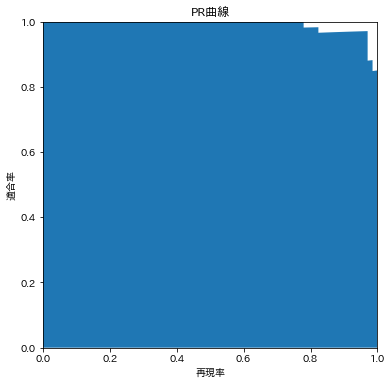

In [25]:
# 描画サイズ指定
plt.figure(figsize=(6,6))
# グラフ領域の塗りつぶし
plt.fill_between(recall, precision, 0)
#x, yの範囲指定
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

#ラベル・タイトルの表示
plt.xlabel('再現率')
plt.ylabel('適合率')
plt.title('PR曲線')
plt.show()

In [26]:
# PR曲線下面積の計算
# 指標としては、0.9以上だと性能が良いとされている
# auc ( area under the curve)
from sklearn.metrics import auc
pr_auc = auc(recall, precision)
print(f'PR曲線下面積 : {pr_auc:.4f}')

PR曲線下面積 : 0.9906


In [27]:
# ROC 曲線用配列の生成

# ライブラリの導入
from sklearn.metrics import roc_curve

# 偽陽性率、敏感度、閾値の取得
# drop_intermediate = False (閾値を変えたときに変化しない時が省略されないように設定)
fpr, tpr, thresholds = roc_curve(
    y_test, y_proba1, drop_intermediate=False)


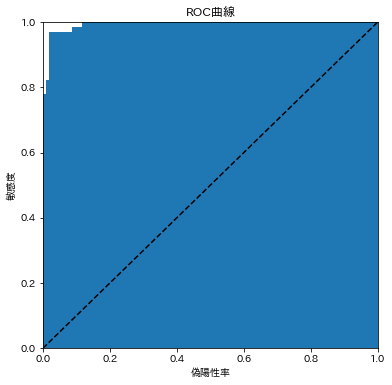

In [28]:
# ROC曲線の描画

# 描画サイズ指定
plt.figure(figsize=(6,6))

# 点線の表示
plt.plot([0, 1], [0, 1], 'k--')

# グラフ領域の塗りつぶし
plt.fill_between(fpr, tpr, 0)

# x, yの範囲の指定
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# ラベル・タイトルの表示
plt.xlabel('偽陽性率')
plt.ylabel('敏感度')
plt.title('ROC曲線')
plt.show()

In [29]:
# ROC曲線下面積の計算
roc_auc = auc(fpr, tpr)
print(f'ROC曲線下面積 : {roc_auc:.4f}')

ROC曲線下面積 : 0.9937


### 入力項目の重要度

　　予測をするにあたってどの項目がどの程度関与しているか

In [30]:
# ランダムフォレストのモデルを作るまで

# サンプルデータの読み込み
import seaborn as sns
df_iris = sns.load_dataset("iris")
columns_i = ['がく片長', 'がく片幅', '花弁長', '花弁幅', '種別']
df_iris.columns = columns_i

# 入力データx
x = df_iris[['がく片長', 'がく片幅', '花弁長', '花弁幅']]

# 正解データy
y = df_iris['種別']

# アルゴリズムの選択
from sklearn.ensemble import RandomForestClassifier
algorithm = RandomForestClassifier(random_state=random_seed)

# 学習
algorithm.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [31]:
# 重要ベクトルの取得
importances = algorithm.feature_importances_

# 項目名をキーにSeriesを生成
w = pd.Series(importances, index=x.columns)

#　値の大きい順にソート
u = w.sort_values(ascending=False)

# 結果確認
print(u)

花弁長    0.4611
花弁幅    0.4257
がく片長   0.0874
がく片幅   0.0257
dtype: float64


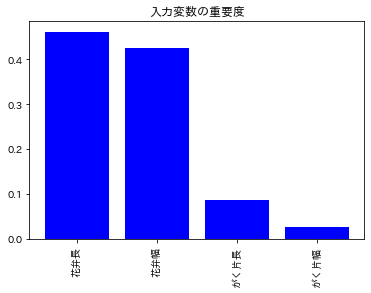

In [32]:
# 重要度の棒グラフの表示

# 棒グラフ表示
plt.bar(range(len(u)), u, color='b', align='center')

# 項目名の表示(90度回転)
plt.xticks(range(len(u)), u.index, rotation=90)

#　タイトルの表示
plt.title('入力変数の重要度')

plt.show()

# 課題

　入力変数の重要度を探索木やXGBoostを用いて比較を行うこと

In [33]:
# 学習
from sklearn.tree import DecisionTreeClassifier
algorithm = DecisionTreeClassifier(random_state=random_seed)

# 学習
algorithm.fit(x,y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [34]:
# 重要ベクトルの取得
importances = algorithm.feature_importances_

# 項目名をキーにSeriesを生成
w = pd.Series(importances, index=x.columns)

#　値の大きい順にソート
u = w.sort_values(ascending=False)

# 結果確認
print(u)

花弁長    0.5507
花弁幅    0.4226
がく片長   0.0267
がく片幅   0.0000
dtype: float64


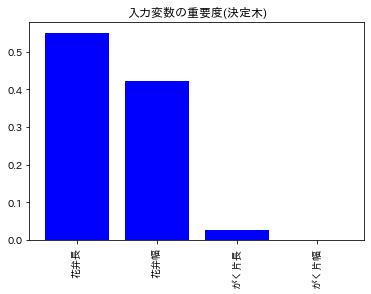

In [35]:
# 重要度の棒グラフの表示

# 棒グラフ表示
plt.bar(range(len(u)), u, color='b', align='center')

# 項目名の表示(90度回転)
plt.xticks(range(len(u)), u.index, rotation=90)

#　タイトルの表示
plt.title('入力変数の重要度(決定木)')

plt.show()

In [36]:
# アルゴリズムの選択
import xgboost
algorithm = xgboost.XGBClassifier(random_state=random_seed)

# 学習
algorithm.fit(x,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [37]:
# 重要ベクトルの取得
importances = algorithm.feature_importances_

# 項目名をキーにSeriesを生成
w = pd.Series(importances, index=x.columns)

#　値の大きい順にソート
u = w.sort_values(ascending=False)

# 結果確認
print(u)

花弁長    0.5958
花弁幅    0.3582
がく片幅   0.0335
がく片長   0.0125
dtype: float32


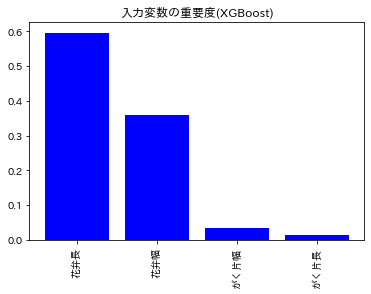

In [38]:
# 重要度の棒グラフの表示

# 棒グラフ表示
plt.bar(range(len(u)), u, color='b', align='center')

# 項目名の表示(90度回転)
plt.xticks(range(len(u)), u.index, rotation=90)

#　タイトルの表示
plt.title('入力変数の重要度(XGBoost)')

plt.show()

以上の結果から　**ほとんどの判断は花弁長と花弁幅で行われている**

### 回帰のモデルの評価方法

 　今までは、「分類」の評価をおこなってきた。

 　もう一つの「教師あり学習」の処理パターンである「回帰」の評価方法

 **分類と回帰モデルの違い**

  分類　：　０または１という決まった値をとる
  
  回帰　：　数値をとる

**回帰の評価の難しさ**

 分類の場合は　：　あっているかはずれているかという単純な評価が可能

 回帰は、「値」を予測する処理パターンなので, 簡単な割り算での評価は難しい
 
　　**正解データと予測結果の差を評価する**

 **決定係数($R^{2}$値）**　：　予測結果の大きさを気にせずに使える代表的な評価値

 　予測結果と正解データが全てのデータでぴったり一致する理想的な素速の場合　：　１になる
 
 　どの入力データでも予測結果が同じになる「何もしないモデル」の場合　：　０になる

 　→　１に近い値になると性能が良い
 
  


In [40]:
#データ読み込みからデータ分割まで

# データ読み込み(ボストン・データセット)
from sklearn.datasets import load_boston
boston = load_boston()

# df: 入力データ
df = pd.DataFrame(boston.data, columns=boston.feature_names)

# y: 正解データ
y = boston.target

# 1項目だけの入力データ df1を作る
df1 = df[['RM']]

# 結果確認
display(df.head())
display(df1.head())
print(y[:5])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.0063,18.0000,2.3100,0.0000,0.5380,6.5750,65.2000,4.0900,1.0000,296.0000,15.3000,396.9000,4.9800
1,0.0273,0.0000,7.0700,0.0000,0.4690,6.4210,78.9000,4.9671,2.0000,242.0000,17.8000,396.9000,9.1400
2,0.0273,0.0000,7.0700,0.0000,0.4690,7.1850,61.1000,4.9671,2.0000,242.0000,17.8000,392.8300,4.0300
3,0.0324,0.0000,2.1800,0.0000,0.4580,6.9980,45.8000,6.0622,3.0000,222.0000,18.7000,394.6300,2.9400
4,0.0691,0.0000,2.1800,0.0000,0.4580,7.1470,54.2000,6.0622,3.0000,222.0000,18.7000,396.9000,5.3300


,RM
0,6.5750
1,6.4210
2,7.1850
3,6.9980
4,7.1470


[24.  21.6 34.7 33.4 36.2]


データ　「ボストン・データセット」　　→　回帰モデルでよく使われるデータセット

algorithm 1: 「ボストンデータセット」の入力項目のうち, 特定の項目(RM)のいを用いて学習と予測を実施　 \\
予測結果をy_pred1として取得

algorithm2 : 「ボストンデータセット」の入力全13項目を用いて学習・予測を実施 \\
予測結果をy_pred2として取得

In [41]:
# アルゴリズム選定から予測まで

# アルゴリズム: XGBRegressor
from xgboost import XGBRegressor
algorithm1 = XGBRegressor(objective ='reg:squarederror',
    random_state=random_seed)

# 学習 (入力データにdf1を利用)
algorithm1.fit(df1, y)

# 予測
y_pred1 = algorithm1.predict(df1)


# アルゴリズム: XGBRegressor
from xgboost import XGBRegressor
algorithm2 = XGBRegressor(objective ='reg:squarederror',
    random_state=random_seed)

# 学習 (入力データにdfを利用)
algorithm2.fit(df, y)

# 予測
y_pred2 = algorithm2.predict(df)

In [43]:
#結果確認

print(f'y[:5] {y[:5]}')
print(f'y_pred1[:5] {y_pred1[:5]}')
print(f'y_pred2[:5] {y_pred2[:5]}')

y[:5] [24.  21.6 34.7 33.4 36.2]
y_pred1[:5] [25.438  20.3028 33.6333 31.4608 33.9829]
y_pred2[:5] [26.6479 22.2483 34.0721 34.315  35.4908]


In [44]:
# 評価１　：散布図による評価
# yの最大値と最小値の計算
y_range = np.array([y.min(), y.max()])

#結果確認
print(y_range)

[ 5. 50.]


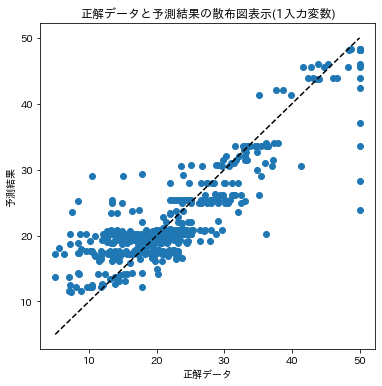

In [46]:
# 散布図による結果確認　(1入力変数)

# 描画サイズ指定
plt.figure(figsize=(6,6))

#　散布図
plt.scatter(y, y_pred1)

# 正解データ＝予測結果の直線
plt.plot(y_range, y_range, 'k--')

# ラベル・タイトル
plt.xlabel('正解データ')
plt.ylabel('予測結果')
plt.title('正解データと予測結果の散布図表示(1入力変数)')

plt.show()

# 課題

　 全入力を挿入した場合の散布図も作成して性能がどうかを比較せよ

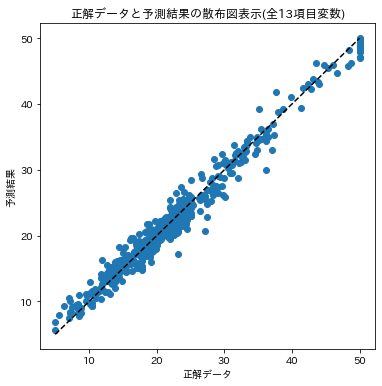

In [48]:
# 散布図による結果確認　(全13項目変数)

# 描画サイズ指定
plt.figure(figsize=(6,6))

#　散布図
plt.scatter(y, y_pred2)

# 正解データ＝予測結果の直線
plt.plot(y_range, y_range, 'k--')

# ラベル・タイトル
plt.xlabel('正解データ')
plt.ylabel('予測結果')
plt.title('正解データと予測結果の散布図表示(全13項目変数)')

plt.show()

In [52]:
#r2 scoreの計算 (1入力変数)
from sklearn.metrics import r2_score
r2_score1 = r2_score(y, y_pred1)
print(f'R2 score(1入力変数) : {r2_score1:.4f}')

R2 score(1入力変数) : 0.7424


In [53]:
#r2 scoreの計算　（全13入力変数)
r2_score2 = r2_score(y, y_pred2)
print(f'R2 scofe(全13入力変数): {r2_score2:.4f}')

R2 scofe(全13入力変数): 0.9720
